### Assignment 1 (4 scores):

- Use Numpy only to construct the Logistic Regression model.
- Train that Logistic Regression model dataset using the Gradient Descend approach on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset. *Note that three class in this dataset must be merge into two class as: graduate and non-graduate (dropout or enroll)*.
- Evaluate that Logistic Regression model on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Visualize the loss function of the training process.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Bước 1: Tải dữ liệu
df = pd.read_csv('data.csv', sep=';')



In [3]:
# Bước 2: Tiền xử lý dữ liệu
# Hợp nhất lớp: Graduate = 1, Dropout/Enrolled = 0
df['Target'] = df['Target'].map({'Graduate': 1, 'Dropout': 0, 'Enrolled': 0})

In [4]:
# Tách X và y
X = df.drop('Target', axis=1).values
y = df['Target'].values

In [5]:
# Thêm cột bias
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

In [6]:
# Chuẩn hóa đặc trưng (trừ bias)
X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)

In [7]:
# Khởi tạo trọng số theta
theta = np.zeros(X.shape[1])

In [8]:
# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
# Hàm loss (binary cross-entropy)
def loss(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    # Tránh log(0) bằng cách thêm epsilon nhỏ
    epsilon = 1e-5
    return - (1/m) * (y @ np.log(h + epsilon) + (1 - y) @ np.log(1 - h + epsilon))

In [10]:
# Hàm gradient
def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    return (1/m) * X.T @ (h - y)

In [11]:
# Gradient Descent
def gradient_descent(X, y, theta, alpha, epochs):
    losses = []
    for _ in range(epochs):
        grad = gradient(theta, X, y)
        theta -= alpha * grad
        current_loss = loss(theta, X, y)
        losses.append(current_loss)
    return theta, losses

In [12]:
# Bước 3 & 4: Huấn luyện mô hình
alpha = 0.01  # Tốc độ học
epochs = 1000  # Số epoch
theta, losses = gradient_descent(X, y, theta, alpha, epochs)

In [13]:
# Bước 5: Đánh giá mô hình
def predict(X, theta):
    return sigmoid(X @ theta) >= 0.5

preds = predict(X, theta)
accuracy = np.mean(preds == y)
print(f'Độ chính xác (Accuracy): {accuracy * 100:.2f}%')

Độ chính xác (Accuracy): 83.41%


In [14]:
import matplotlib.pyplot as plt

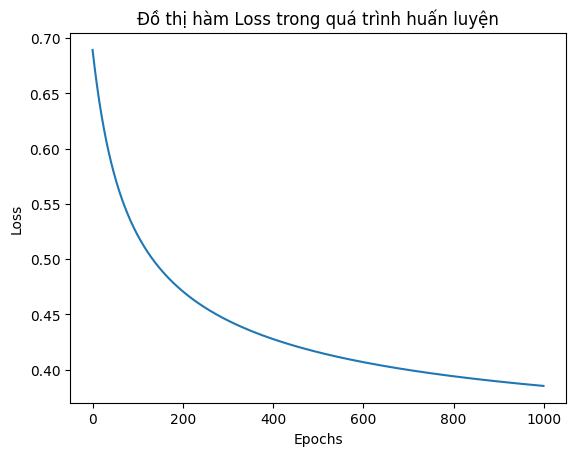

In [15]:
# Bước 6: Trực quan hóa loss
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Đồ thị hàm Loss trong quá trình huấn luyện')
plt.show()

### Assignment 2 (4 scores):

- Use Numpy only to construct the Sofmax Regression model.
- Train that Logistic Regression model dataset using the Gradient Descend approach on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Evaluate that Logistic Regression model on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Visualize the loss function of the training process.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')


In [17]:
# Thiết lập style cho seaborn
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 10


In [18]:
# Bước 1: Tải dữ liệu
df = pd.read_csv('data.csv', sep=';')

In [19]:
# Mã hóa nhãn: Dropout=0, Enrolled=1, Graduate=2
df['Target'] = df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

In [20]:
# Kiểm tra dữ liệu
print(f"Số lượng mẫu: {len(df)}")
print(f"Phân phối lớp:\n{df['Target'].value_counts()}")


Số lượng mẫu: 4424
Phân phối lớp:
Target
2    2209
0    1421
1     794
Name: count, dtype: int64


In [21]:
# Tách X và y
X = df.drop('Target', axis=1).values
y = df['Target'].values


In [22]:
# Chia train/test (80/20) với stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nKích thước tập train: {X_train.shape[0]} mẫu")
print(f"Kích thước tập test: {X_test.shape[0]} mẫu")


Kích thước tập train: 3539 mẫu
Kích thước tập test: 885 mẫu


In [23]:
# Thêm cột bias
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])


In [24]:
# Chuẩn hóa đặc trưng
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0) + 1e-8
X_train_bias[:, 1:] = (X_train - X_train_mean) / X_train_std
X_test_bias[:, 1:] = (X_test - X_train_mean) / X_train_std

In [25]:
# One-hot encoding cho nhãn
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

num_classes = 3
y_train_one_hot = one_hot_encode(y_train, num_classes)
y_test_one_hot = one_hot_encode(y_test, num_classes)

In [26]:
# Bước 2: Hàm Softmax và các hàm hỗ trợ
def softmax(z):
    z = np.clip(z, -250, 250)  # Ngăn overflow
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [27]:
def loss(W, X, y_one_hot):
    m = X.shape[0]
    scores = X @ W
    probs = softmax(scores)
    epsilon = 1e-15
    return - (1/m) * np.sum(y_one_hot * np.log(probs + epsilon))


In [28]:
def gradient(W, X, y_one_hot):
    m = X.shape[0]
    scores = X @ W
    probs = softmax(scores)
    return (1/m) * (X.T @ (probs - y_one_hot))


In [29]:
def predict_proba(X, W):
    scores = X @ W
    return softmax(scores)

In [30]:
def predict(X, W):
    probs = predict_proba(X, W)
    return np.argmax(probs, axis=1)

In [31]:
# Bước 3: Gradient Descent với early stopping
def gradient_descent(X, y_one_hot, W, alpha, epochs, tolerance=1e-4):
    losses = []
    prev_loss = float('inf')
    for epoch in range(epochs):
        grad = gradient(W, X, y_one_hot)
        W -= alpha * grad
        current_loss = loss(W, X, y_one_hot)
        losses.append(current_loss)
        if abs(prev_loss - current_loss) < tolerance:
            print(f"Early stopping tại epoch {epoch}")
            break
        prev_loss = current_loss
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {current_loss:.4f}")
    return W, losses

In [32]:
# Bước 4: Huấn luyện mô hình
print("\nBắt đầu huấn luyện...")
alpha = 0.01
epochs = 2000
W = np.zeros((X_train_bias.shape[1], num_classes))
W, train_losses = gradient_descent(X_train_bias, y_train_one_hot, W, alpha, epochs)

# Bước 5: Đánh giá mô hình
train_preds = predict(X_train_bias, W)
train_accuracy = np.mean(train_preds == y_train)
test_preds = predict(X_test_bias, W)
test_accuracy = np.mean(test_preds == y_test)
print(f"\nKết quả đánh giá:")
print(f"Độ chính xác tập train: {train_accuracy*100:.2f}%")
print(f"Độ chính xác tập test: {test_accuracy*100:.2f}%")



Bắt đầu huấn luyện...
Epoch 0, Loss: 1.0906
Epoch 100, Loss: 0.7766
Epoch 200, Loss: 0.6999
Epoch 300, Loss: 0.6640
Epoch 400, Loss: 0.6430
Epoch 500, Loss: 0.6293
Early stopping tại epoch 541

Kết quả đánh giá:
Độ chính xác tập train: 75.76%
Độ chính xác tập test: 75.59%


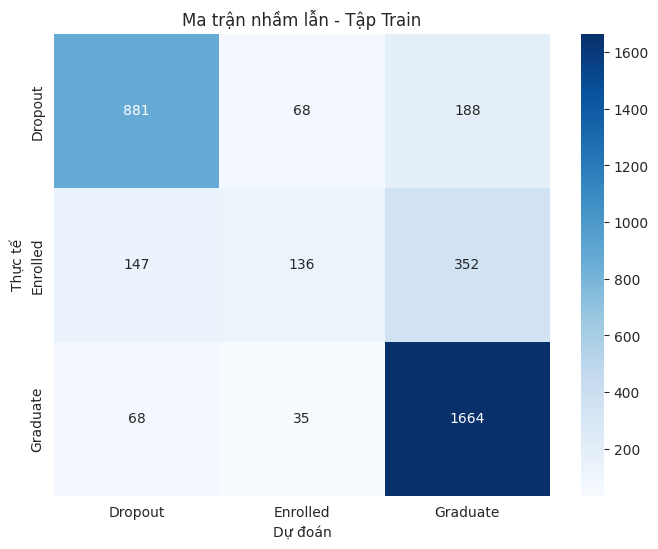

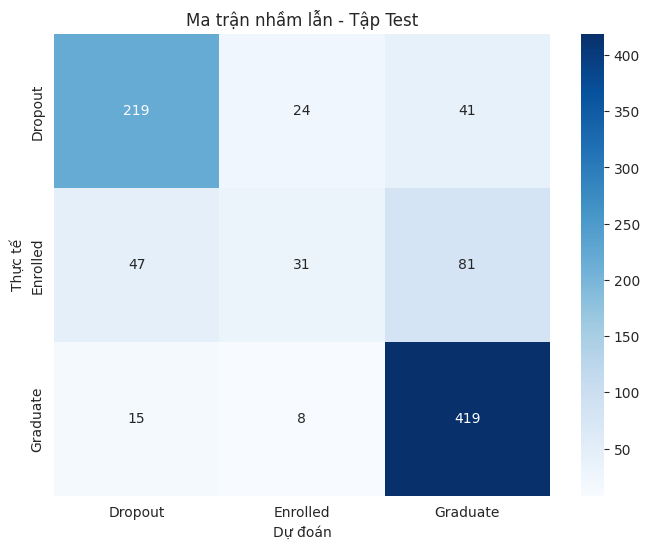

In [33]:
# Bước 6: Vẽ ma trận nhầm lẫn
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Dropout', 'Enrolled', 'Graduate'],
                yticklabels=['Dropout', 'Enrolled', 'Graduate'])
    plt.title(f'Ma trận nhầm lẫn - {title}')
    plt.ylabel('Thực tế')
    plt.xlabel('Dự đoán')
    plt.show()

plot_confusion_matrix(y_train, train_preds, 'Tập Train')
plot_confusion_matrix(y_test, test_preds, 'Tập Test')

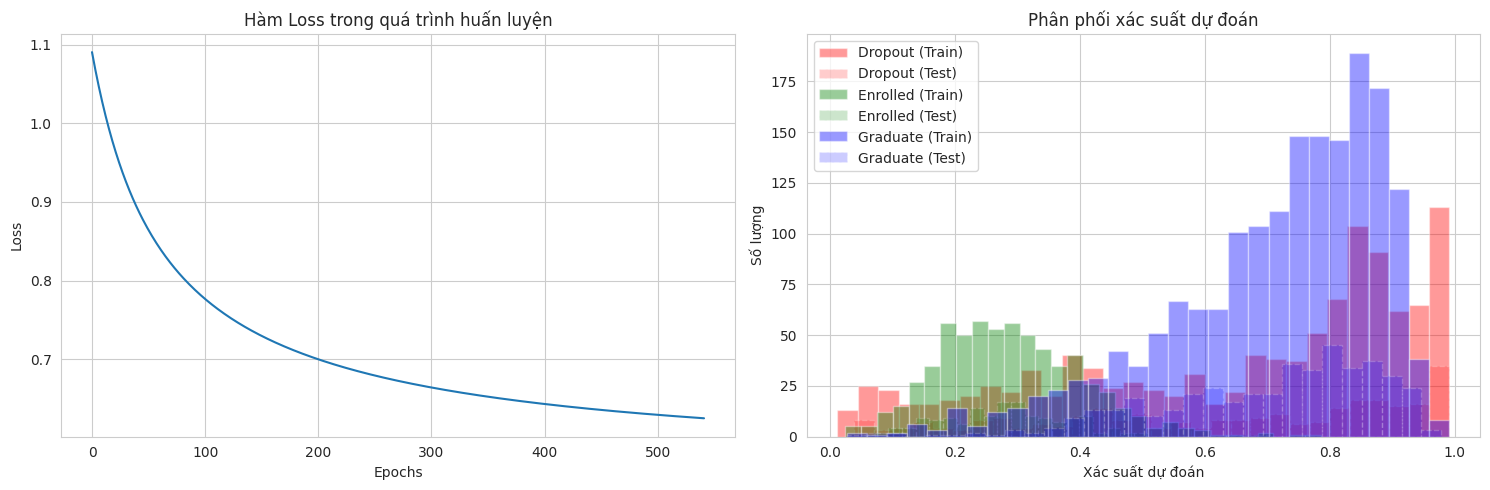

In [34]:
# Bước 7: Trực quan hóa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Loss curve
ax1.plot(train_losses)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Hàm Loss trong quá trình huấn luyện')
ax1.grid(True)

# Phân phối xác suất dự đoán
train_probs = predict_proba(X_train_bias, W)
test_probs = predict_proba(X_test_bias, W)
for i, label in enumerate(['Dropout', 'Enrolled', 'Graduate']):
    ax2.hist(train_probs[y_train == i, i], bins=30, alpha=0.4, label=f'{label} (Train)', color=['red', 'green', 'blue'][i])
    ax2.hist(test_probs[y_test == i, i], bins=30, alpha=0.2, label=f'{label} (Test)', linestyle='--', color=['red', 'green', 'blue'][i])
ax2.set_xlabel('Xác suất dự đoán')
ax2.set_ylabel('Số lượng')
ax2.set_title('Phân phối xác suất dự đoán')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

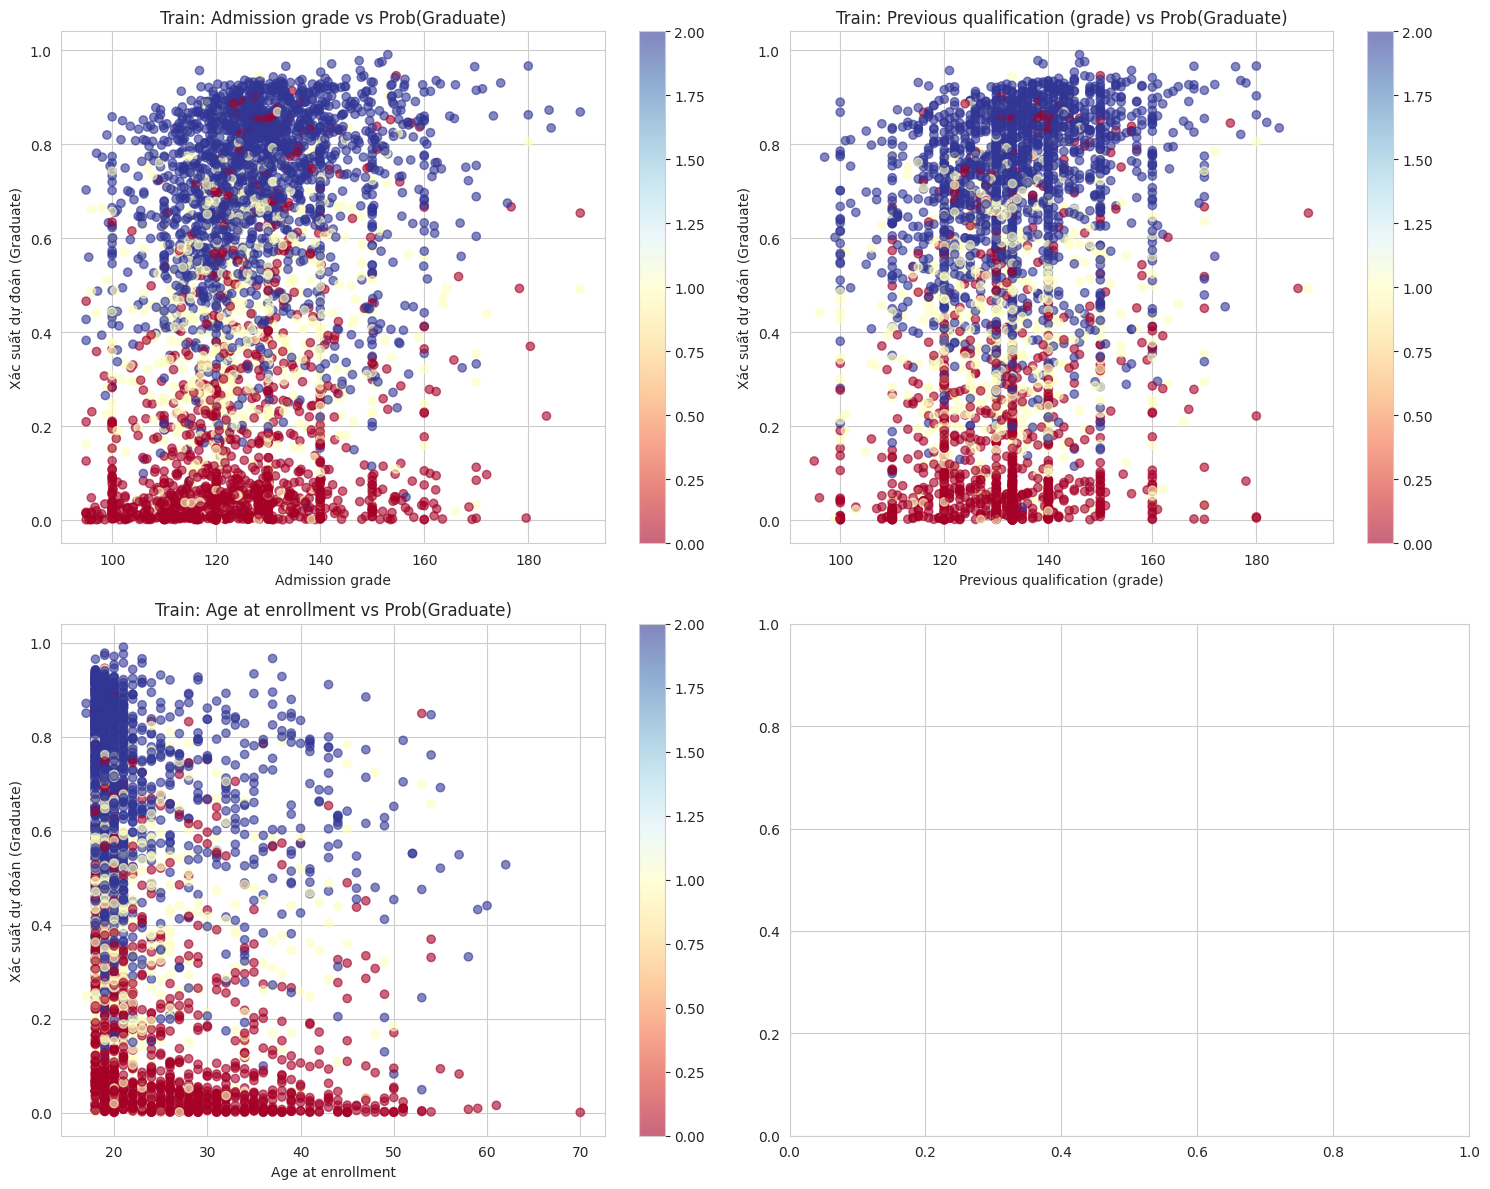

In [35]:
# Bước 8: Trực quan hóa đặc trưng quan trọng
important_features = ['Admission grade', 'Previous qualification (grade)', 'Age at enrollment']
feature_names = df.drop('Target', axis=1).columns
feature_indices = [list(feature_names).index(f) for f in important_features if f in feature_names]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()
for i, idx in enumerate(feature_indices[:4]):
    scatter = axes[i].scatter(X_train[:, idx], train_probs[:, 2], c=y_train, cmap='RdYlBu', alpha=0.6)
    axes[i].set_xlabel(feature_names[idx])
    axes[i].set_ylabel('Xác suất dự đoán (Graduate)')
    axes[i].set_title(f'Train: {feature_names[idx]} vs Prob(Graduate)')
    plt.colorbar(scatter, ax=axes[i])
plt.tight_layout()
plt.show()

### Assignment 3 (2 scores):

- Use a Machine Learning library (Scikit Learn or Skorch) to implement and evaluate the Logistic Regression on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Use a Machine Learning library (Scikit Learn or Skorch) to implement and evaluate the Softmax Regression on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')


In [37]:
# Thiết lập style cho seaborn
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 10


In [38]:
df = pd.read_csv('data.csv', sep=';')

In [39]:
# Chuẩn bị dữ liệu cho Logistic Regression (Binary)
df_binary = df.copy()
df_binary['Target'] = df_binary['Target'].map({'Graduate': 1, 'Dropout': 0, 'Enrolled': 0})
print(f"\nSố lượng mẫu (Binary): {len(df_binary)}")
print(f"Phân phối lớp (Binary):\n{df_binary['Target'].value_counts()}")


Số lượng mẫu (Binary): 4424
Phân phối lớp (Binary):
Target
0    2215
1    2209
Name: count, dtype: int64


In [40]:
# Chuẩn bị dữ liệu cho Softmax Regression (Multiclass)
df_multi = df.copy()
df_multi['Target'] = df_multi['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})
print(f"\nSố lượng mẫu (Multiclass): {len(df_multi)}")
print(f"Phân phối lớp (Multiclass):\n{df_multi['Target'].value_counts()}")


Số lượng mẫu (Multiclass): 4424
Phân phối lớp (Multiclass):
Target
2    2209
0    1421
1     794
Name: count, dtype: int64


In [41]:
# Tách đặc trưng và nhãn
X = df.drop('Target', axis=1).values
y_binary = df_binary['Target'].values
y_multi = df_multi['Target'].values


In [42]:
# Chia train/test (80/20)
X_train, X_test, y_train_binary, y_test_binary = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)
_, _, y_train_multi, y_test_multi = train_test_split(
    X, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)
print(f"\nKích thước tập train: {X_train.shape[0]} mẫu")
print(f"Kích thước tập test: {X_test.shape[0]} mẫu")



Kích thước tập train: 3539 mẫu
Kích thước tập test: 885 mẫu


In [43]:
# Chuẩn hóa đặc trưng
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Bước 2: Logistic Regression (Binary)
print("\nHuấn luyện Logistic Regression (Binary)...")
lr_binary = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
lr_binary.fit(X_train_scaled, y_train_binary)


Huấn luyện Logistic Regression (Binary)...


LogisticRegression(max_iter=1000, random_state=42)

In [45]:
# Dự đoán
train_preds_binary = lr_binary.predict(X_train_scaled)
test_preds_binary = lr_binary.predict(X_test_scaled)
train_probs_binary = lr_binary.predict_proba(X_train_scaled)[:, 1]
test_probs_binary = lr_binary.predict_proba(X_test_scaled)[:, 1]


In [46]:
# Đánh giá
train_acc_binary = accuracy_score(y_train_binary, train_preds_binary)
test_acc_binary = accuracy_score(y_test_binary, test_preds_binary)
print(f"Độ chính xác tập train (Binary): {train_acc_binary*100:.2f}%")
print(f"Độ chính xác tập test (Binary): {test_acc_binary*100:.2f}%")


Độ chính xác tập train (Binary): 85.48%
Độ chính xác tập test (Binary): 82.49%


In [47]:
# Bước 3: Softmax Regression (Multiclass)
print("\nHuấn luyện Softmax Regression (Multiclass)...")
lr_multi = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000, random_state=42)
lr_multi.fit(X_train_scaled, y_train_multi)



Huấn luyện Softmax Regression (Multiclass)...


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [48]:
# Dự đoán
train_preds_multi = lr_multi.predict(X_train_scaled)
test_preds_multi = lr_multi.predict(X_test_scaled)
train_probs_multi = lr_multi.predict_proba(X_train_scaled)
test_probs_multi = lr_multi.predict_proba(X_test_scaled)


In [49]:
# Đánh giá
train_acc_multi = accuracy_score(y_train_multi, train_preds_multi)
test_acc_multi = accuracy_score(y_test_multi, test_preds_multi)
print(f"Độ chính xác tập train (Multiclass): {train_acc_multi*100:.2f}%")
print(f"Độ chính xác tập test (Multiclass): {test_acc_multi*100:.2f}%")

Độ chính xác tập train (Multiclass): 50.16%
Độ chính xác tập test (Multiclass): 48.70%


In [50]:
# Bước 4: Vẽ ma trận nhầm lẫn
def plot_confusion_matrix(y_true, y_pred, title, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Ma trận nhầm lẫn - {title}')
    plt.ylabel('Thực tế')
    plt.xlabel('Dự đoán')
    plt.show()

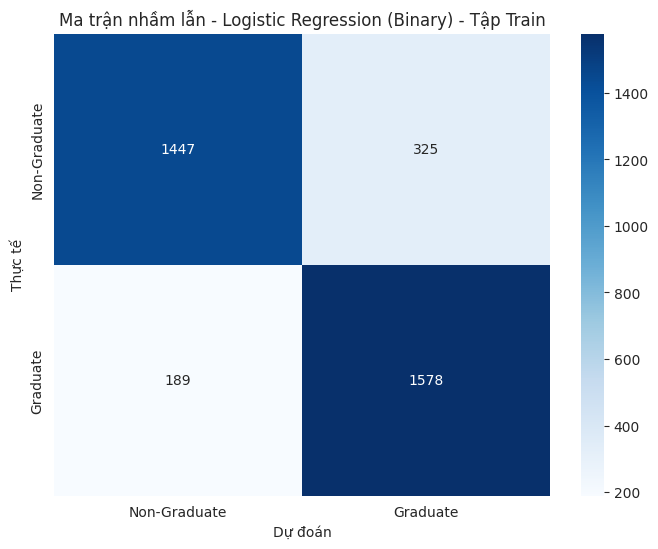

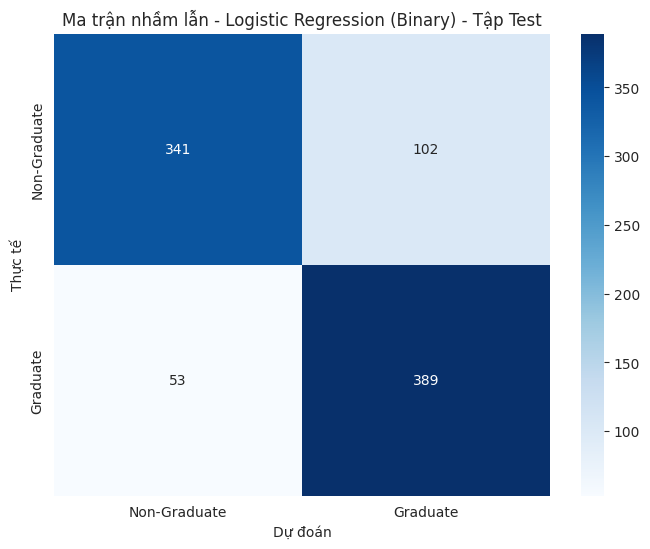

In [51]:
# Ma trận nhầm lẫn cho Logistic Regression (Binary)
plot_confusion_matrix(y_train_binary, train_preds_binary, 'Logistic Regression (Binary) - Tập Train',
                     labels=['Non-Graduate', 'Graduate'])
plot_confusion_matrix(y_test_binary, test_preds_binary, 'Logistic Regression (Binary) - Tập Test',
                     labels=['Non-Graduate', 'Graduate'])


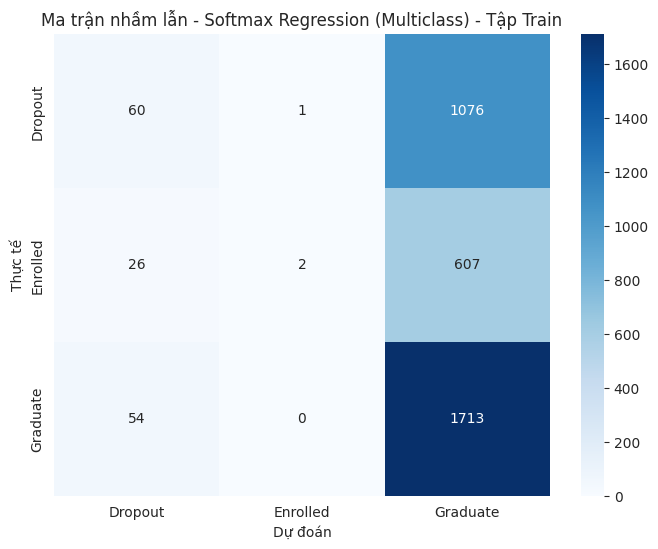

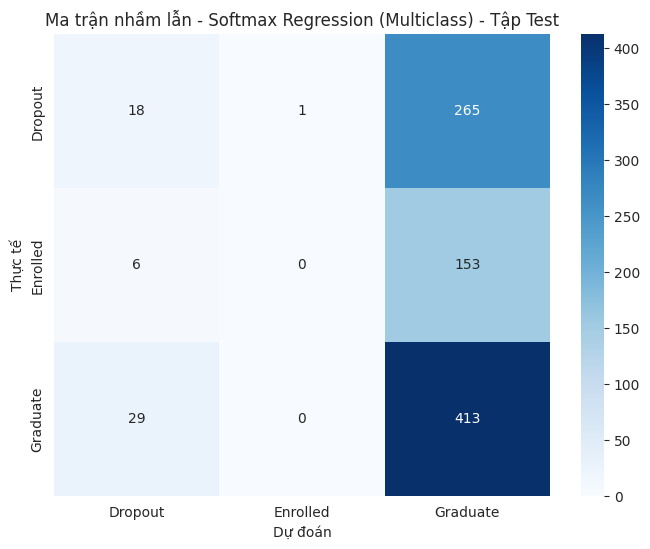

In [52]:
# Ma trận nhầm lẫn cho Softmax Regression (Multiclass)
plot_confusion_matrix(y_train_multi, train_preds_multi, 'Softmax Regression (Multiclass) - Tập Train',
                     labels=['Dropout', 'Enrolled', 'Graduate'])
plot_confusion_matrix(y_test_multi, test_preds_multi, 'Softmax Regression (Multiclass) - Tập Test',
                     labels=['Dropout', 'Enrolled', 'Graduate'])

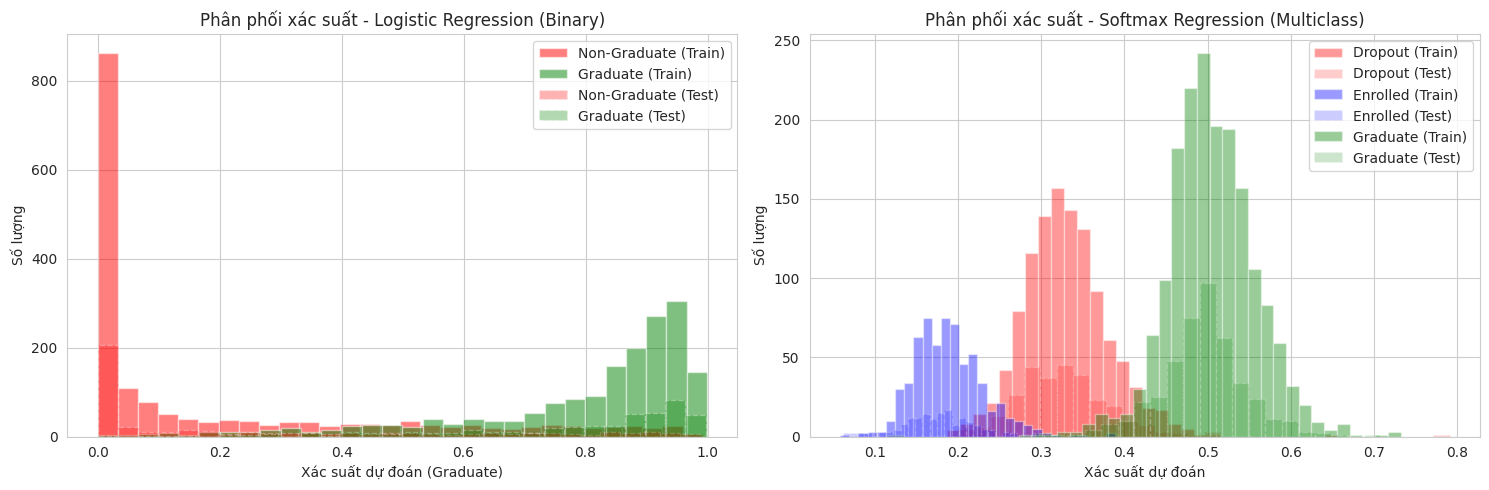

In [59]:
# Bước 5: Trực quan hóa phân phối xác suất
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Logistic Regression (Binary)
ax1.hist(train_probs_binary[y_train_binary==0], bins=30, alpha=0.5, label='Non-Graduate (Train)', color='red')
ax1.hist(train_probs_binary[y_train_binary==1], bins=30, alpha=0.5, label='Graduate (Train)', color='green')
ax1.hist(test_probs_binary[y_test_binary==0], bins=30, alpha=0.3, label='Non-Graduate (Test)', color='red', linestyle='--')
ax1.hist(test_probs_binary[y_test_binary==1], bins=30, alpha=0.3, label='Graduate (Test)', color='green', linestyle='--')
ax1.set_xlabel('Xác suất dự đoán (Graduate)')
ax1.set_ylabel('Số lượng')
ax1.set_title('Phân phối xác suất - Logistic Regression (Binary)')
ax1.legend()
ax1.grid(True)

# Softmax Regression (Multiclass)
for i, label in enumerate(['Dropout', 'Enrolled', 'Graduate']):
    ax2.hist(train_probs_multi[y_train_multi==i, i], bins=30, alpha=0.4, label=f'{label} (Train)',
             color=['red', 'blue', 'green'][i])
    ax2.hist(test_probs_multi[y_test_multi==i, i], bins=30, alpha=0.2, label=f'{label} (Test)',
             color=['red', 'blue', 'green'][i], linestyle='--')
ax2.set_xlabel('Xác suất dự đoán')
ax2.set_ylabel('Số lượng')
ax2.set_title('Phân phối xác suất - Softmax Regression (Multiclass)')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

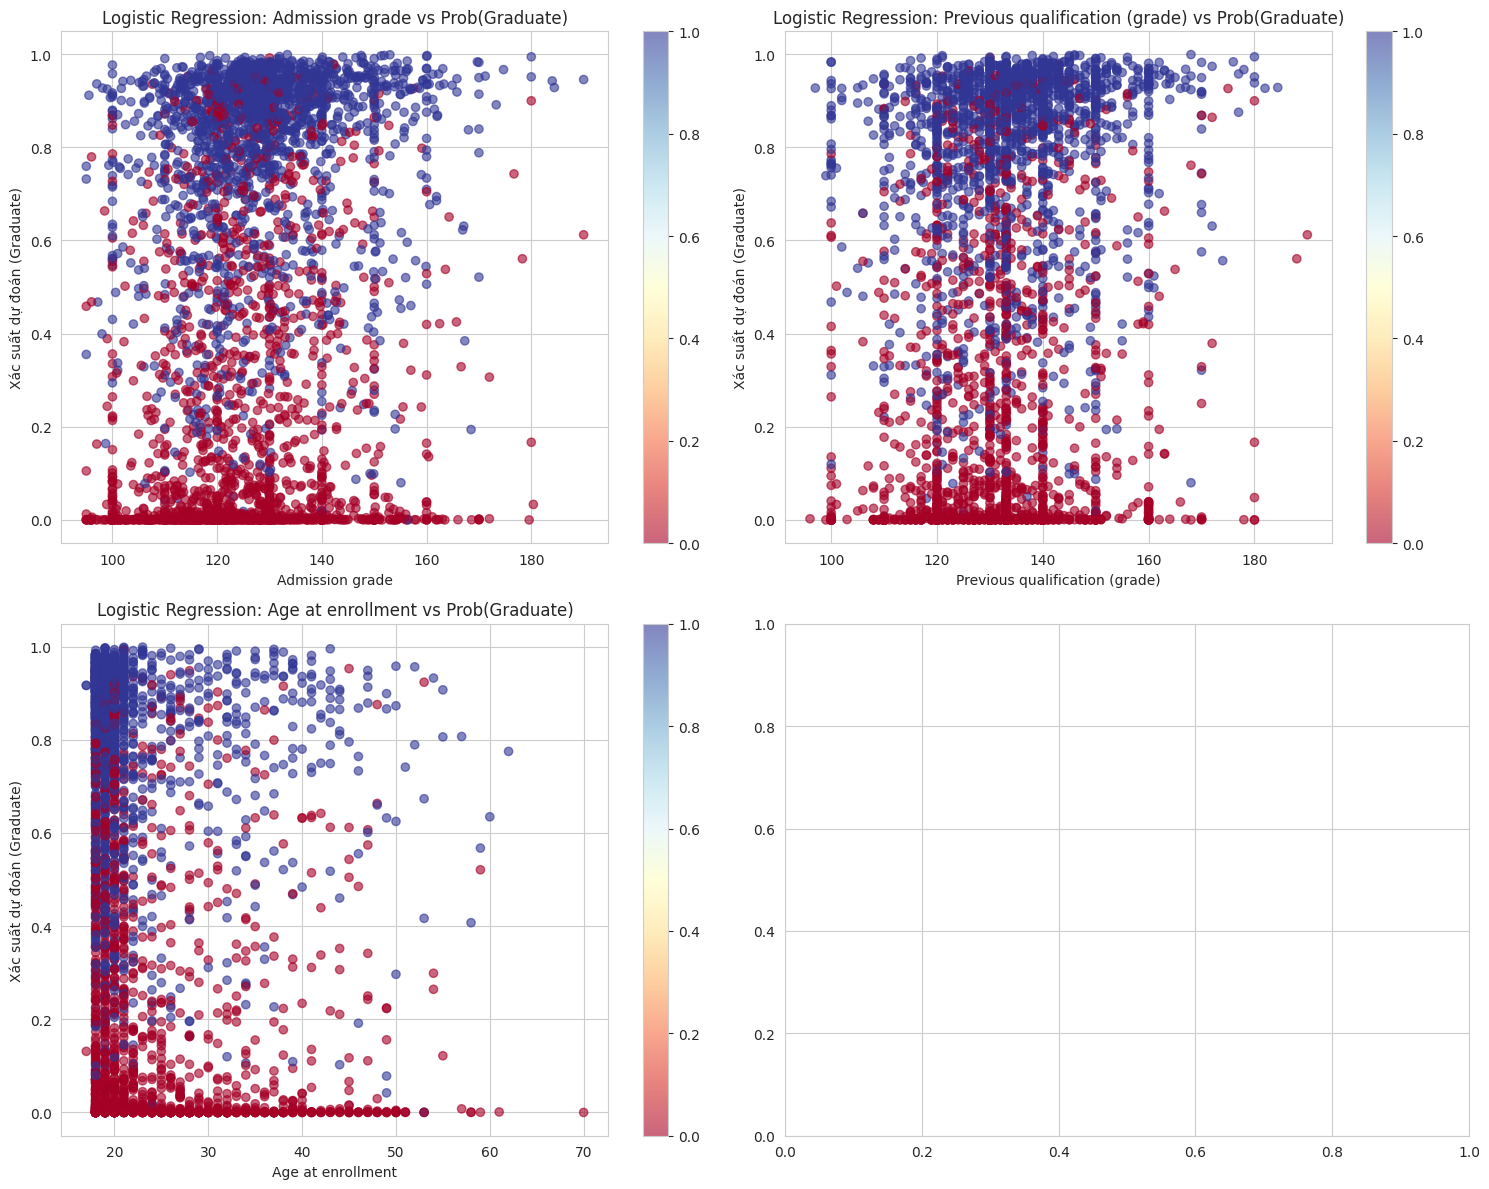

In [56]:
# Bước 6: Trực quan hóa đặc trưng quan trọng
important_features = ['Admission grade', 'Previous qualification (grade)', 'Age at enrollment']
feature_names = df.drop('Target', axis=1).columns
feature_indices = [list(feature_names).index(f) for f in important_features if f in feature_names]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()
for i, idx in enumerate(feature_indices[:3]):
    # Logistic Regression (Binary)
    scatter1 = axes[i].scatter(X_train[:, idx], train_probs_binary, c=y_train_binary, cmap='RdYlBu', alpha=0.6)
    axes[i].set_xlabel(feature_names[idx])
    axes[i].set_ylabel('Xác suất dự đoán (Graduate)')
    axes[i].set_title(f'Logistic Regression: {feature_names[idx]} vs Prob(Graduate)')
    plt.colorbar(scatter1, ax=axes[i])
plt.tight_layout()
plt.show()


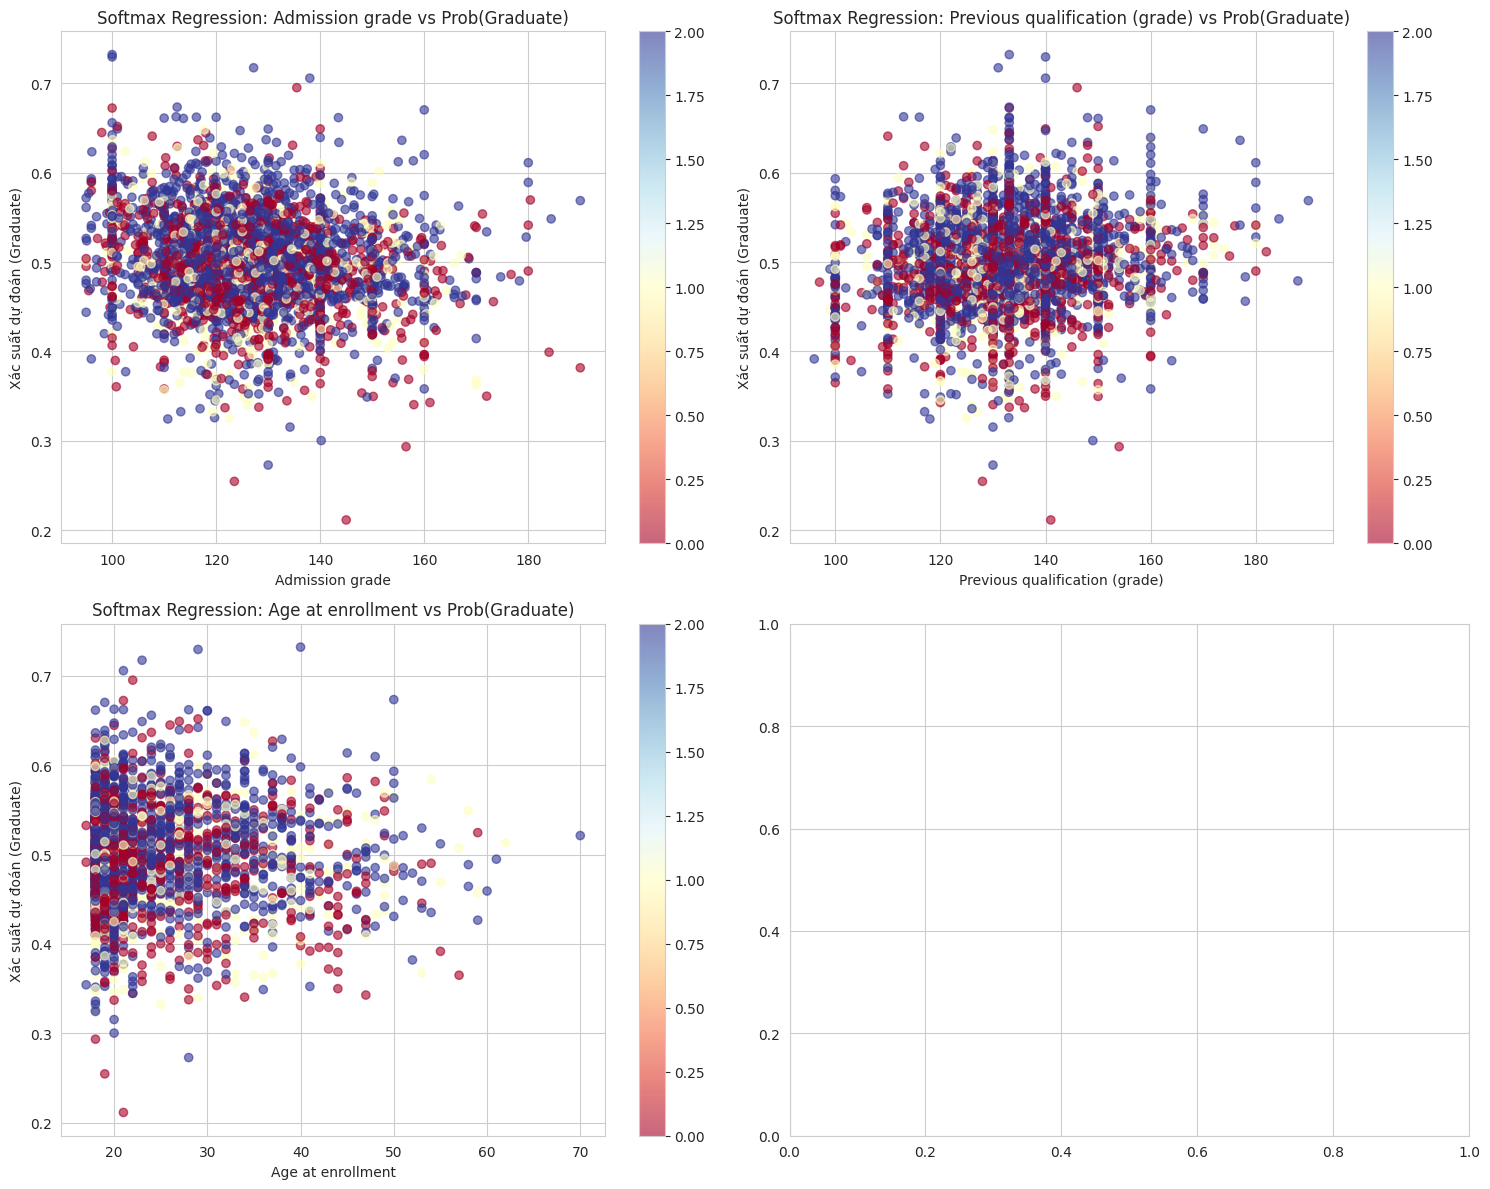

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()
for i, idx in enumerate(feature_indices[:3]):
    # Softmax Regression (Multiclass)
    scatter2 = axes[i].scatter(X_train[:, idx], train_probs_multi[:, 2], c=y_train_multi, cmap='RdYlBu', alpha=0.6)
    axes[i].set_xlabel(feature_names[idx])
    axes[i].set_ylabel('Xác suất dự đoán (Graduate)')
    axes[i].set_title(f'Softmax Regression: {feature_names[idx]} vs Prob(Graduate)')
    plt.colorbar(scatter2, ax=axes[i])
plt.tight_layout()
plt.show()

# Task
Construct, train, and evaluate a Logistic Regression model using only NumPy for binary classification on the "Predict students’ dropout and academic success dataset" dataset. The model should be trained using Gradient Descent, and the three original classes in the dataset should be merged into two: "graduate" and "non-graduate". Visualize the loss function during the training process.

## Load and preprocess the data

### Subtask:
Load the dataset and merge the three classes into two: "graduate" and "non-graduate". Split the data into training and testing sets.


**Reasoning**:
Load the dataset, merge the classes, separate features and target, and split into training and testing sets as per the instructions.

